05/2022

## Práctica de Splines

Isabel Morro Tabares y Francisca Morales Castellón

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def SplineNatural (x, y): 
    
    "Devuelve la matriz 4xn de los coeficientes del polinomio"
    
    n = len(x)
    A=np.zeros([n,n])
    b = np.zeros(n) 
    h = np.zeros(n-1)
    pendiente = np.zeros(n-1)
    d = np.zeros(n)
    spline = np.zeros([n-1,4]) 
    
    pos=n-1
    
    # Cálculo de las longitudes
    for i in range (0, n-1):
        h[i] = x[i+1]-x[i]
        pendiente[i] = (y[i+1] - y[i]) / h[i] 
    
    print (h)
    print (pendiente)
    
    # Creamos matriz de coeficientes    
    A[0][0] = 2/h[0]
    A[0][1] = 1/h[0]
    
    for j in range (1,pos):
        
        A[j][j] = 2*((1/h[j])+(1/h[j-1]))
        A[j][j-1] = 1/h[j-1]
        A[j][j+1] = 1/h[j]
    
    A[pos][pos] = 2/h[pos-1]
    A[pos][pos-1] = 1/h[pos-1]
    
    print (A)
    
    # Creamos términos independientes
    b[0] = pendiente[0] / h[0]
    b[n-1] = pendiente[n-2] / h[n-2]
    
    for k in range (1,n-1):
        b[k] = (pendiente[k] / h[k]) + (pendiente [k-1]/ h[k-1])
    b = 3*b
    
    print (b)
    
    # Obtenemos las derivadas
    d = np.linalg.solve(A,b)
    
    print (d)
    
   # Calculamos polinomios
    for i in range (0,n-1) : 
        spline [i][0] = y[i]
        spline [i][1] = d[i]
        spline [i][2] = (pendiente[i]-d[i])/h[i]
        spline [i][3] = ((d[i]+d[i+1])-2*pendiente[i])/(h[i]**2)
        
    return spline

In [110]:
def plotspline (x,y, color):
    
    t = np.arange (0,len(x),1)
    
    sx = SplineNatural (t,x)
    sy = SplineNatural (t,y)
    
    print (sx)
    print (sy)
    
    p = np.arange (0,len(t), 0.1)
    
    _x = np.zeros (len(p))
    _y = np.zeros (len(p))
    
    k=0
    for i in range (0,len(t)-1):
        for j in range (0, len(p)-1):
            if (t[i] < p[j] and p[j] < t[i+1]):
                _x[k] = sx[i][0] + sx[i][1]*(p[i]-x[i])+sx[i][2]*(p[i]-x[i])**2+sx[i][3]*(p[i]-x[i]**2)*(p[i]-x[i+1])
                _y[k] = sy[i][0] + sy[i][1]*(p[i]-y[i])+sy[i][2]*(p[i]-y[i])**2+sy[i][3]*(p[i]-y[i]**2)*(p[i]-y[i+1])
                k+=1
    print (_x)
    print (_y)
    
    plt.plot(_x, _y,color)

[1. 1. 1. 1. 1.]
[0.2 0.3 0.5 1.  0.5]
[[2. 1. 0. 0. 0. 0.]
 [1. 4. 1. 0. 0. 0.]
 [0. 1. 4. 1. 0. 0.]
 [0. 0. 1. 4. 1. 0.]
 [0. 0. 0. 1. 4. 1.]
 [0. 0. 0. 0. 1. 2.]]
[0.6 1.5 2.4 4.5 4.5 1.5]
[0.17559809 0.24880383 0.3291866  0.83444976 0.83301435 0.33349282]
[[ 1.          0.17559809  0.02440191  0.02440191]
 [ 1.2         0.24880383  0.05119617 -0.02200957]
 [ 1.5         0.3291866   0.1708134   0.16363636]
 [ 2.          0.83444976  0.16555024 -0.33253589]
 [ 3.          0.83301435 -0.33301435  0.16650718]]
[1. 1. 1. 1. 1.]
[0.5  0.5  0.25 0.25 0.5 ]
[[2. 1. 0. 0. 0. 0.]
 [1. 4. 1. 0. 0. 0.]
 [0. 1. 4. 1. 0. 0.]
 [0. 0. 1. 4. 1. 0.]
 [0. 0. 0. 1. 4. 1.]
 [0. 0. 0. 0. 1. 2.]]
[1.5  3.   2.25 1.5  2.25 1.5 ]
[0.48325359 0.53349282 0.38277512 0.1854067  0.37559809 0.56220096]
[[ 2.          0.48325359  0.01674641  0.01674641]
 [ 2.5         0.53349282 -0.03349282 -0.08373206]
 [ 3.          0.38277512 -0.13277512  0.06818182]
 [ 3.25        0.1854067   0.0645933   0.06100478]
 [ 3.5   

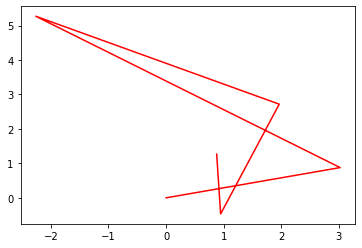

In [111]:
# Tramo verde
ptosx = [1, 1.2, 1.5, 2, 3, 3.5]
x = np.array (ptosx)
ptosy = [2, 2.5, 3, 3.25, 3.5, 4]
y = np.array (ptosy)

plotspline (x,y,'r')

In [ ]:
       #_x[j] = sx[i][0] + sx[i][1]*(t[k]-x[i])+sx[i][2]*(t[k]-x[i])**2+sx[i][3]*(t[k]-x[i]**2)*(t[k]-x[i+1])
        #_y[j] = sy[i][0] + sy[i][1]*(t[k]-y[i])+sy[i][2]*(t[k]-y[i])**2+sy[i][3]*(t[k]-y[i]**2)*(t[k]-y[i+1])
            #j += 1